<a href="https://colab.research.google.com/github/Panuvat-Dan/Machine_learning_study/blob/main/IBM_ML_logis_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Data Preprocessing

## 1.1Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1.2Importing the dataset

In [214]:
dataset = pd.read_csv('IBM_sample_employee_dataset_csv.csv')
X = dataset.iloc[:, :-1].values # independent column
y = dataset.iloc[:, -1].values # target column

In [194]:
print(X)

[[41 'Travel_Rarely' 1102 ... 4 0 5]
 [49 'Travel_Frequently' 279 ... 7 1 7]
 [37 'Travel_Rarely' 1373 ... 0 0 0]
 ...
 [27 'Travel_Rarely' 155 ... 2 0 3]
 [49 'Travel_Frequently' 1023 ... 6 0 8]
 [34 'Travel_Rarely' 628 ... 3 1 2]]


In [195]:
print(y)

['Yes' 'No' 'Yes' ... 'No' 'No' 'No']


## 1.3Data exploration

#### 1.3.1 Explore basic descriptive statistic

In [215]:
dataset.shape

(1470, 35)

In [197]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### 1.3.2 Find missing data

In [164]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

There is no missing value in any columns and 26 numeric / 9 catagories

In [165]:
# Define fucntion for object graph
def bar_grpah(variable,)

SyntaxError: ignored

#### 1.3.3 Filter out indenpendent features by visualization several graphs

notethat : I' ll reduce the independent variables by selecting the important varaibles easiest way. However, we could apply Recursive Feature Elimination , or even Tree-based feature selection futhur for very complex features selection but for reducing complexity. Therefore, I am going to reduce independent variable. The better selection of feature, the better model of machine learning 

##### 1.3.3.1 Heatmap

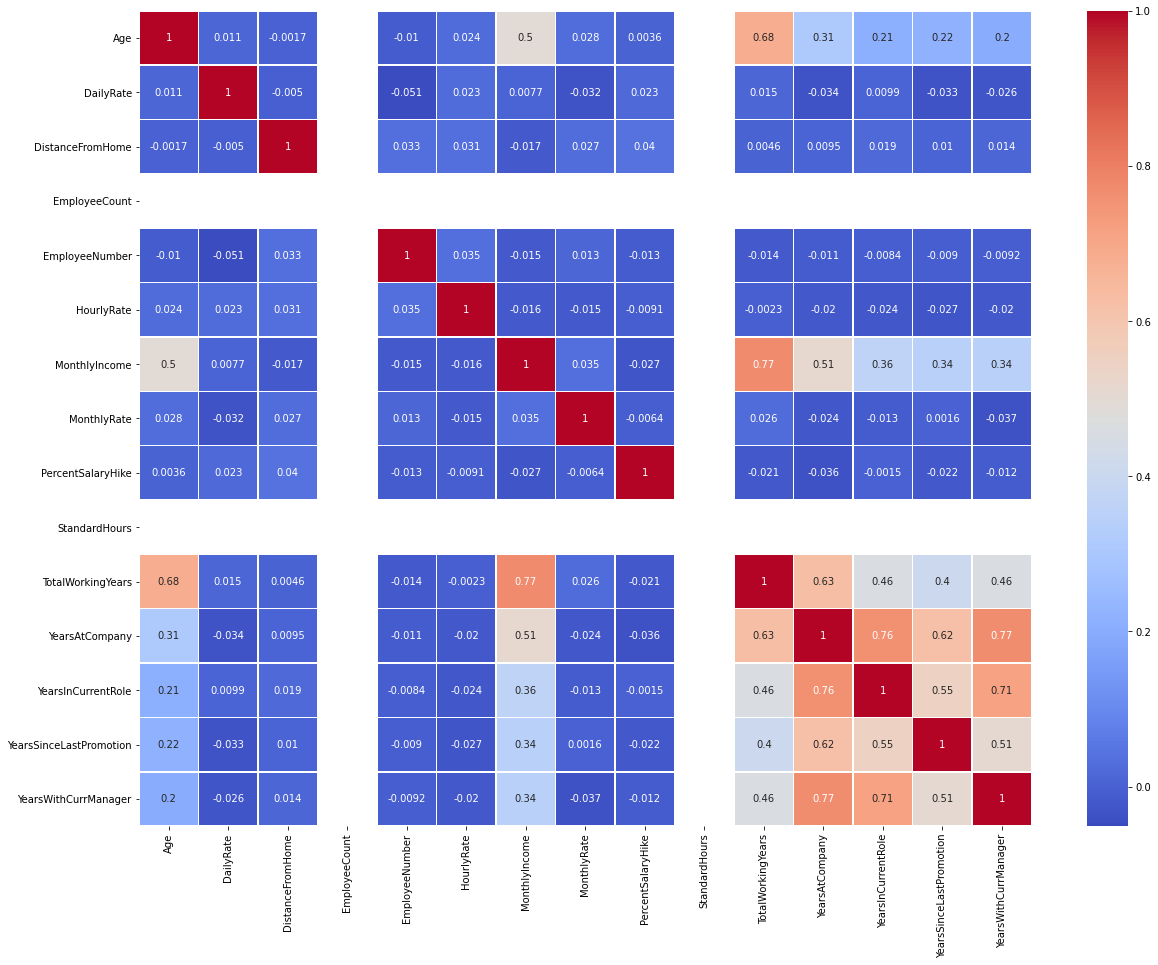

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

##### 1.3.3.2 Age vs Attrition

We shall see people tend to leave organisation within lower age than higher age which make sense compared to other organisations.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


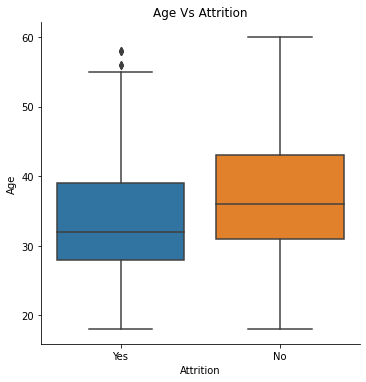

In [33]:
sns.factorplot(data=dataset,y='Age',x='Attrition',size=5,aspect=1,kind='box')
plt.title("Age Vs Attrition")
plt.show()

##### 1.3.3.3 Department VS Attrition

This is imbalancing dataset which you can see on grpah the attrition on HR department is quite lower than others and we shall scaling this variable in the futhur step. Moreover, the trend shows that sales department have highest resign ratio around 1/3 times (Maths : Yes value / No value)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


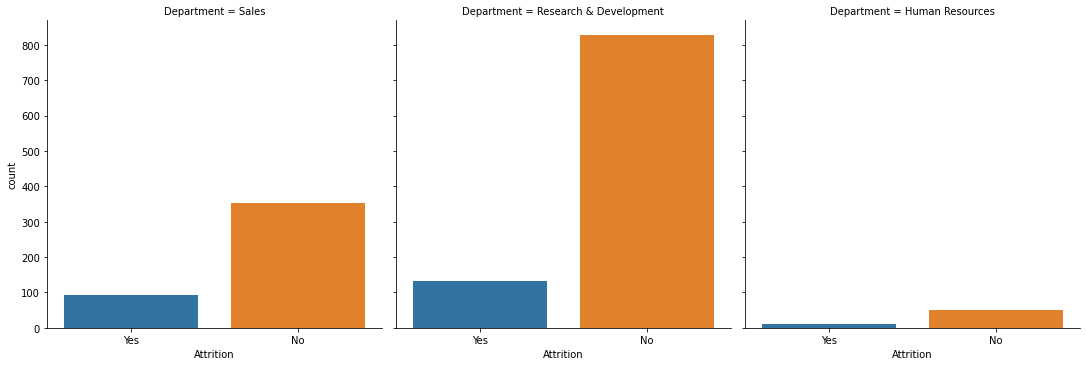

In [37]:
sns.factorplot(data=dataset,kind='count',x='Attrition',col='Department')

##### 1.3.3.4 Gender VS Attrition

The population of organisation between male and female is quite the same. However, ratio of resign is similar to each other.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


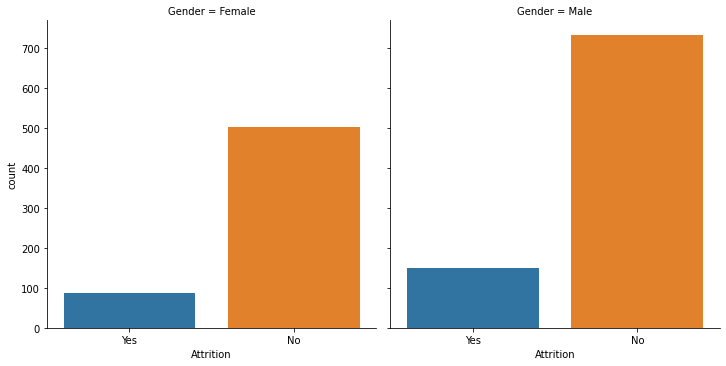

In [36]:
sns.factorplot(data=dataset,kind='count',x='Attrition',col='Gender')

##### 1.3.3.5 Salary VS Attrition

This is only the average of the monthlyincome which we shall see that people who resign tend to have lower salary than people who stay at organisation

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


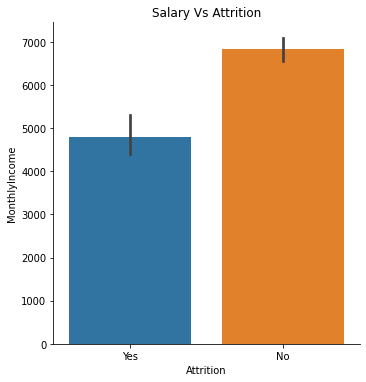

In [38]:
sns.factorplot(data=dataset,kind='bar',x='Attrition',y='MonthlyIncome')
plt.title("Salary Vs Attrition")
plt.show()

##### 1.3.3.6 Performance VS attrition

We can see that the ratio between Yes and No of the grpah is the same. Therefore, we can't actually find any relation of those two. Thus, we are going to drop performancerating.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


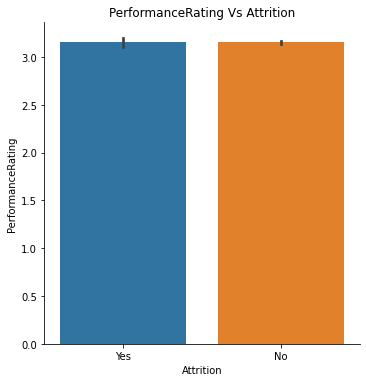

In [41]:
sns.factorplot(data=dataset,y='PerformanceRating',x='Attrition',kind='bar')
plt.title("PerformanceRating Vs Attrition")
plt.show()

##### 1.3.3.7 Yearatcompany VS attrition

We can see that the average year which employee resigned around 5 year.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


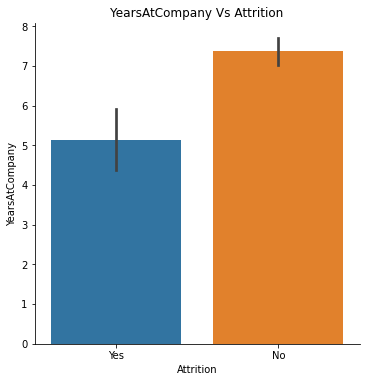

In [45]:
sns.factorplot(data=dataset,y='YearsAtCompany',x='Attrition',kind='bar')
plt.title("YearsAtCompany Vs Attrition")
plt.show()

##### 1.3.3.8 Education VS attrition

We can see that the relationship between education level and attrition is quite low even it is the average value.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


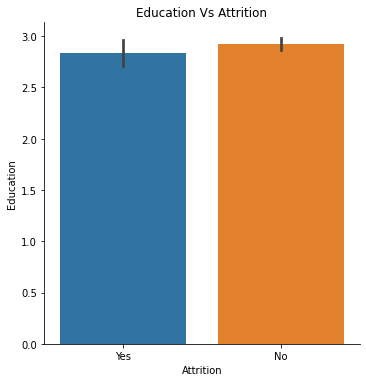

In [46]:
sns.factorplot(data=dataset,y='Education',x='Attrition',kind='bar')
plt.title("Education Vs Attrition")
plt.show()

##### 1.3.3.9 Worklifebalance VS attrition

We can see the average of worklifebalcne score is equal to attrition average score result in non-relationship

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


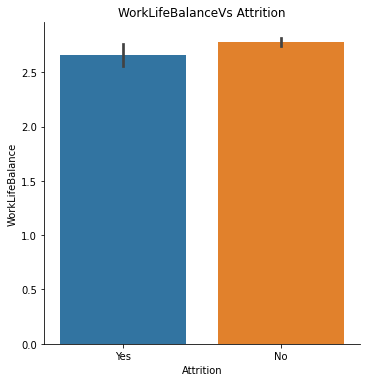

In [48]:
sns.factorplot(data=dataset,y='WorkLifeBalance',x='Attrition',kind='bar')
plt.title("WorkLifeBalanceVs Attrition")
plt.show()

##### 1.3.3.10 Education level VS attrition

1 = Below college
2 = College
3 = Bacherlor
4 = Master
5 = Doctor

It shows that bachelor degree has highest leakage of employee whereas the dataset is still imbalance

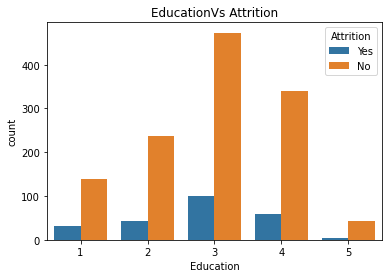

In [55]:
sns.countplot(x='Education',hue='Attrition',data=dataset)
plt.title("EducationVs Attrition")
plt.show()

##### 1.3.3.11 Distancefromhome VS attrition

We can definitely see that distance from home is quite related to resign of employee. As you see in the graph, the lower distance, the higher no attrition value.

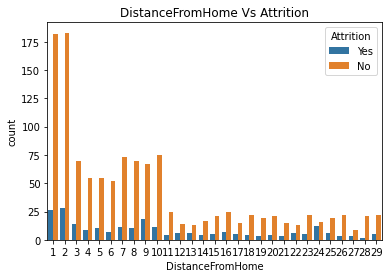

In [166]:
sns.countplot(x='DistanceFromHome',hue='Attrition',data=dataset)
plt.title("DistanceFromHome Vs Attrition")
plt.show()

##### 1.3.3.12 JobSatisfaction VS attrition

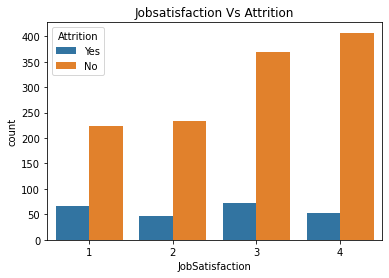

In [59]:
sns.countplot(x='JobSatisfaction',hue='Attrition',data=dataset)
plt.title("Jobsatisfaction Vs Attrition")
plt.show()

##### 1.3.3.13 Yearsincelastpromote VS attrition

We can see that people who just promoted around 0-2 years tend to stay at organisation compared to people who don't promote for long time. However, interesting point is the highest value of resgin is 0 year and it is literally mean that those people don't jave a chance to promote or people who just come in the organisation.



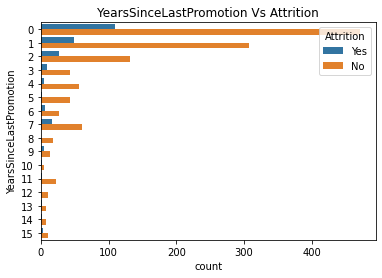

In [75]:
sns.countplot(y='YearsSinceLastPromotion',hue='Attrition',data=dataset)
plt.title("YearsSinceLastPromotion Vs Attrition")
plt.show()

#### 1.3.4 Feature Selection

Reduce the independent varaible column to 18 columns and target variable 1 column

In [216]:
dataset.drop(['BusinessTravel','DailyRate','Education','EmployeeCount', 'EmployeeNumber', 'HourlyRate','JobLevel','MaritalStatus','MonthlyRate','NumCompaniesWorked','Over18', 'StandardHours','StockOptionLevel','WorkLifeBalance'], axis=1, inplace=True)

In [217]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Department                1470 non-null   object
 2   DistanceFromHome          1470 non-null   int64 
 3   EducationField            1470 non-null   object
 4   EnvironmentSatisfaction   1470 non-null   int64 
 5   Gender                    1470 non-null   object
 6   JobInvolvement            1470 non-null   int64 
 7   JobRole                   1470 non-null   object
 8   JobSatisfaction           1470 non-null   int64 
 9   MonthlyIncome             1470 non-null   int64 
 10  OverTime                  1470 non-null   object
 11  PercentSalaryHike         1470 non-null   int64 
 12  PerformanceRating         1470 non-null   int64 
 13  RelationshipSatisfaction  1470 non-null   int64 
 14  TotalWorkingYears       

## 1.4Encoding categorical data

### 1.4.1Encoding dependent Variables

In [218]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset["Attrition"] = label.fit_transform(dataset.Attrition)

In [219]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Department                1470 non-null   object
 2   DistanceFromHome          1470 non-null   int64 
 3   EducationField            1470 non-null   object
 4   EnvironmentSatisfaction   1470 non-null   int64 
 5   Gender                    1470 non-null   object
 6   JobInvolvement            1470 non-null   int64 
 7   JobRole                   1470 non-null   object
 8   JobSatisfaction           1470 non-null   int64 
 9   MonthlyIncome             1470 non-null   int64 
 10  OverTime                  1470 non-null   object
 11  PercentSalaryHike         1470 non-null   int64 
 12  PerformanceRating         1470 non-null   int64 
 13  RelationshipSatisfaction  1470 non-null   int64 
 14  TotalWorkingYears       

,Age,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Sales,1,Life Sciences,2,Female,3,Sales Executive,4,5993,Yes,11,3,1,8,0,6,4,0,5,1
1,49,Research & Development,8,Life Sciences,3,Male,2,Research Scientist,2,5130,No,23,4,4,10,3,10,7,1,7,0
2,37,Research & Development,2,Other,4,Male,2,Laboratory Technician,3,2090,Yes,15,3,2,7,3,0,0,0,0,1
3,33,Research & Development,3,Life Sciences,4,Female,3,Research Scientist,3,2909,Yes,11,3,3,8,3,8,7,3,0,0
4,27,Research & Development,2,Medical,1,Male,3,Laboratory Technician,2,3468,No,12,3,4,6,3,2,2,2,2,0


### 1.4.2Encoding independent Variables

convert the catagorical data to numerical data

In [220]:
final_data = pd.get_dummies(dataset)

In [221]:
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DistanceFromHome                   1470 non-null   int64
 2   EnvironmentSatisfaction            1470 non-null   int64
 3   JobInvolvement                     1470 non-null   int64
 4   JobSatisfaction                    1470 non-null   int64
 5   MonthlyIncome                      1470 non-null   int64
 6   PercentSalaryHike                  1470 non-null   int64
 7   PerformanceRating                  1470 non-null   int64
 8   RelationshipSatisfaction           1470 non-null   int64
 9   TotalWorkingYears                  1470 non-null   int64
 10  TrainingTimesLastYear              1470 non-null   int64
 11  YearsAtCompany                     1470 non-null   int64
 12  YearsInCurrentRole  

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes
0,41,1,2,3,4,5993,11,3,1,8,0,6,4,0,5,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,49,8,3,2,2,5130,23,4,4,10,3,10,7,1,7,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,37,2,4,2,3,2090,15,3,2,7,3,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,3,4,3,3,2909,11,3,3,8,3,8,7,3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,27,2,1,3,2,3468,12,3,4,6,3,2,2,2,2,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [224]:
final_data.shape

(1470, 38)

## 1.5Splitting the dataset into the Training set and Test set

In [225]:
X = final_data.drop(['Attrition'], axis = 1) #independent variable
y = final_data['Attrition'] #dependent variable

In [238]:
print(X)

      Age  DistanceFromHome  ...  OverTime_No  OverTime_Yes
0      41                 1  ...            0             1
1      49                 8  ...            1             0
2      37                 2  ...            0             1
3      33                 3  ...            0             1
4      27                 2  ...            1             0
...   ...               ...  ...          ...           ...
1465   36                23  ...            1             0
1466   39                 6  ...            1             0
1467   27                 4  ...            0             1
1468   49                 2  ...            1             0
1469   34                 8  ...            1             0

[1470 rows x 37 columns]


In [233]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64


In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [237]:
print(X_train)

      Age  DistanceFromHome  ...  OverTime_No  OverTime_Yes
163    57                24  ...            0             1
47     37                19  ...            1             0
1085   31                 3  ...            1             0
98     58                10  ...            1             0
942    36                10  ...            1             0
...   ...               ...  ...          ...           ...
715    33                 1  ...            0             1
905    29                 1  ...            1             0
1096   40                 6  ...            0             1
235    43                16  ...            0             1
1061   24                13  ...            1             0

[1176 rows x 37 columns]


In [228]:
print(X_test)

      Age  DistanceFromHome  ...  OverTime_No  OverTime_Yes
1291   37                10  ...            1             0
1153   18                 3  ...            0             1
720    30                22  ...            0             1
763    34                10  ...            0             1
976    56                23  ...            0             1
...   ...               ...  ...          ...           ...
302    28                16  ...            1             0
443    22                 4  ...            1             0
701    53                 2  ...            1             0
309    31                 5  ...            0             1
845    40                26  ...            0             1

[294 rows x 37 columns]


In [229]:
print(y_train)

163     0
47      0
1085    1
98      0
942     0
       ..
715     0
905     0
1096    0
235     0
1061    0
Name: Attrition, Length: 1176, dtype: int64


In [230]:
print(y_test)

1291    1
1153    1
720     1
763     0
976     0
       ..
302     0
443     1
701     0
309     0
845     0
Name: Attrition, Length: 294, dtype: int64


## 1.6Feature Scaling

Change numeric value to Z-transformation to reduce the deviation from final dataset (Not include variable previously catagory because it might change the interpretion)

In [244]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,:15] = sc.fit_transform(X_train.iloc[:,:15])
X_test.iloc[:,:15] = sc.transform(X_test.iloc[:,:15])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [245]:
print(X_train)

           Age  DistanceFromHome  ...  OverTime_No  OverTime_Yes
163   2.182386          1.820859  ...            0             1
47   -0.010723          1.204862  ...            1             0
1085 -0.668656         -0.766330  ...            1             0
98    2.292042          0.096066  ...            1             0
942  -0.120379          0.096066  ...            1             0
...        ...               ...  ...          ...           ...
715  -0.449345         -1.012729  ...            0             1
905  -0.887967         -1.012729  ...            1             0
1096  0.318243         -0.396732  ...            0             1
235   0.647210          0.835263  ...            0             1
1061 -1.436244          0.465665  ...            1             0

[1176 rows x 37 columns]


In [246]:
print(X_test)

           Age  DistanceFromHome  ...  OverTime_No  OverTime_Yes
1291 -0.010723          0.096066  ...            1             0
1153 -2.094177         -0.766330  ...            0             1
720  -0.778311          1.574460  ...            0             1
763  -0.339690          0.096066  ...            0             1
976   2.072731          1.697660  ...            0             1
...        ...               ...  ...          ...           ...
302  -0.997622          0.835263  ...            1             0
443  -1.655555         -0.643131  ...            1             0
701   1.743765         -0.889530  ...            1             0
309  -0.668656         -0.519931  ...            0             1
845   0.318243          2.067258  ...            0             1

[294 rows x 37 columns]


# 2.Data modeling

## 2.1Logistic Regression method

In [247]:
from sklearn.linear_model import LogisticRegression # import supervior ML which is logisticregression
logis_regressor = LogisticRegression() # Create a logistic regression classifier 
logis_regressor.fit(X_train, y_train) # Train the model using the training sets 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [249]:
y_predict = logis_regressor.predict(X_test) # predict on the test data

In [250]:
print(y_predict)

[0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# 3.Data evaluation

## 3.1 Evaluation of logistic regression

In [252]:
from sklearn import metrics
logis_accur = round( metrics.accuracy_score(y_test, y_predict) * 100, 2 )
print( 'Total Accuracy : ', logis_accur )
print( 'Precision : ', round( metrics.precision_score(y_test, y_predict) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_predict) * 100, 2 ) )

Total Accuracy :  81.63
Precision :  59.09
Recall :  22.41
